In [48]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
import matplotlib.pyplot as plts
import seaborn as sns

In [49]:
##### Read all CSV files in one line of code and shaking the data shape and structure

In [50]:
df_TranAftCamp, df_Credit, df_Customers,df_transactions = [pd.read_csv(f) for f in ['./Data/avg_transactions_after_campaign.csv', './Data/credit_profiles.csv','./Data/customers.csv','./Data/transactions.csv']]

In [51]:
df_TranAftCamp.shape,df_Credit.shape,df_Customers.shape,df_transactions.shape

((62, 3), (1004, 6), (1000, 8), (500000, 7))

In [52]:
##### Makiing a copy of the customer dataset so that we can work on the copy and not the original dataset

In [53]:
df_Customers2 = df_Customers.copy()
df_Customers2.shape,df_Customers2.shape

((1000, 8), (1000, 8))

In [54]:
df_Customers2.isnull().sum()

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

In [55]:
df_Customers2[df_Customers2.annual_income.isnull()].head(5)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,NaN,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,NaN,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,NaN,Married
102,103,Aarav Shah,Male,32,City,Data Scientist,NaN,Married
155,156,Kiaan Saxena,Male,24,City,Fullstack Developer,NaN,Married


In [56]:
df_Customers2[(df_Customers2['occupation'] == 'Artist') & (df_Customers2['name'] == 'Sanjana Malik')]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,NaN,Married


In [57]:
df_Customers2[df_Customers2.annual_income.isnull()].shape

(50, 8)

In [58]:
##### Filling the missing values in the annual_income column with the median based on occupation 

In [59]:
income_by_occupation = df_Customers2.groupby('occupation')['annual_income'].median()
income_by_occupation

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [61]:
##### Filling the missing values in the annual_income column with the median based on occupation

In [62]:
def fill_missing_annual_income(df, income_by_occupation):
    df['annual_income'] = df.apply(
        lambda row: income_by_occupation[row['occupation']] if pd.isnull(row['annual_income']) else row['annual_income'],
        axis=1
    )
    return df

df_Customers2 = fill_missing_annual_income(df_Customers2, income_by_occupation)
df_Customers2.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [63]:
df_Customers2.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

In [64]:
df_Customers2

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married
...,...,...,...,...,...,...,...,...
995,996,Manya Vasudeva,Female,26,City,Freelancer,46759.0,Married
996,997,Aarav Dhawan,Male,55,City,Business Owner,290061.0,Single
997,998,Rehan Jha,Male,29,City,Fullstack Developer,139141.0,Married
998,999,Amara Rathore,Female,47,City,Business Owner,261191.5,Married


In [65]:
df_Customers2[(df_Customers2['occupation'] == 'Artist') & (df_Customers2['name'] == 'Sanjana Malik')]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,45794.0,Married


In [66]:
income_by_occupation['Artist'] 

np.float64(45794.0)

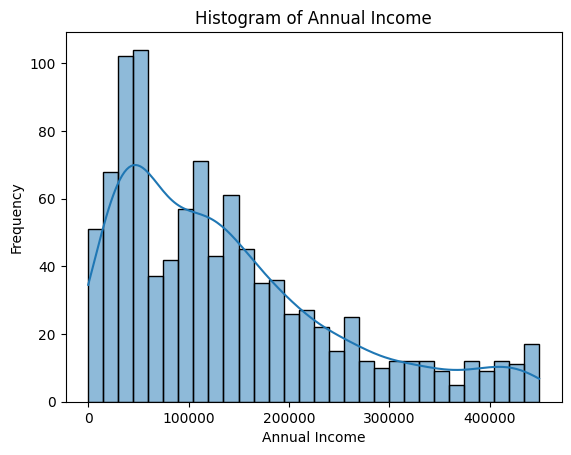

In [68]:
sns.histplot(df_Customers2['annual_income'], bins=30, kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.title('Histogram of Annual Income')
plt.show()